<a href="https://colab.research.google.com/github/santoshdhalwalkar/Telecommunication/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###The health of a connection on a local network or the larger Internet, and is commonly utilized by network administrators to diagnose the speed and reliability of network connections with help of TCP and RTT

In [22]:
#import drive from google
from google.colab import drive

In [23]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
 #read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/cleanedtelecomunication_df.csv")
df.head()

,BearerId,MSISDNNumber,Calculated_Duration_Seconds,AvgRTT_DL,AvgRTT_UL,AvgBearerTP_DL,AvgBearerTP_UL,TCPDLRetransVol_Bytes,TCPULRetransVol_Bytes,GamingDL_Bytes,...,Total_Data,Total_DL,Total_UL,NetflixDL_Bytes,OtherUL_Bytes,OtherDL_Bytes,GamingUL_Bytes,Total_Data.1,Total_DL.1,Total_UL.1
0,1.311450e+19,3.368542e+10,2.434800e+08,45.0,5.0,28.0,41.0,568730.0,20949.5,519620584.0,...,599743023.0,556406594.0,43336429.0,7682779.0,3820483.0,318297673.0,2710989.0,599743023.0,556406594.0,43336429.0
1,1.311450e+19,3.366132e+10,2.365800e+08,46.0,7.0,46.0,46.0,568730.0,20949.5,715350506.0,...,798245704.0,757526492.0,40719212.0,11758420.0,1716480.0,290582586.0,10250922.0,798245704.0,757526492.0,40719212.0
2,1.311450e+19,3.361513e+10,2.317800e+08,45.0,5.0,23.0,51.0,568730.0,20949.5,124180544.0,...,192095344.0,139043208.0,53052136.0,753238.0,14932623.0,350039548.0,14967821.0,192095344.0,139043208.0,53052136.0
3,1.311450e+19,3.366495e+10,2.308200e+08,39.0,2.0,22.0,46.0,568730.0,20949.5,293492651.0,...,359872820.0,329159454.0,30713366.0,17917894.0,11684759.0,495376623.0,1362536.0,359872820.0,329159454.0,30713366.0
4,7.349880e+18,3.366403e+10,2.389200e+08,38.0,1.0,49.0,47.0,568730.0,20949.5,516508263.0,...,604428354.0,546747900.0,57680454.0,1114842.0,9207067.0,624397048.0,8432981.0,604428354.0,546747900.0,57680454.0


In [26]:
df.shape

(65571, 23)

###Create the Box Plot to find the outliers

In [27]:
columns = ['AvgRTT_DL', 'AvgRTT_UL', 'AvgBearerTP_DL', 'AvgBearerTP_UL', 'TCPDLRetransVol_Bytes', 'TCPULRetransVol_Bytes']
df_selected = df[columns]

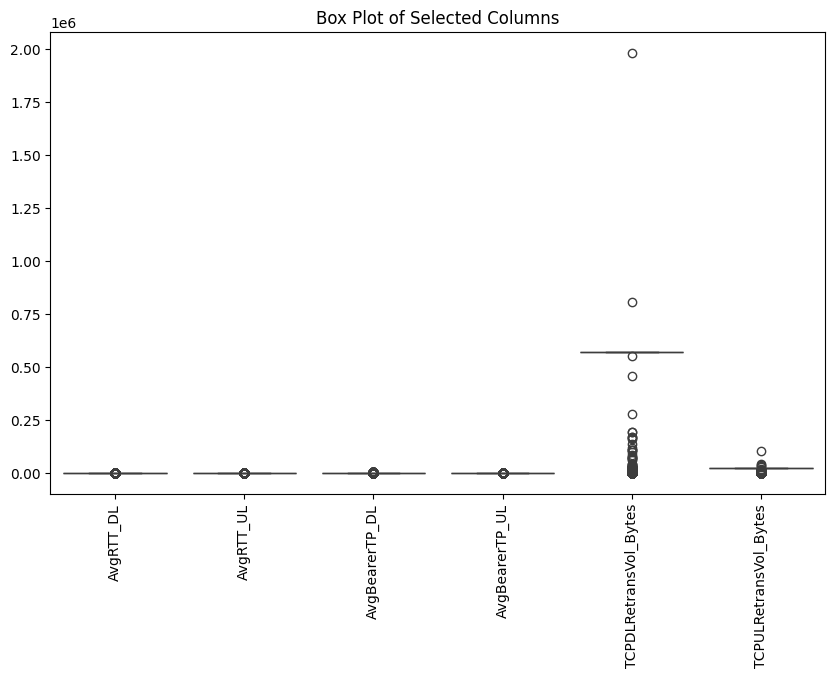

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.title('Box Plot of Selected Columns')
plt.show()

In [31]:
# Function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


# Remove outliers
df = remove_outliers(df, df_selected)

df.head()
df.shape

(57974, 23)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57974 entries, 0 to 65570
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BearerId                     57974 non-null  float64
 1   MSISDNNumber                 57974 non-null  float64
 2   Calculated_Duration_Seconds  57974 non-null  float64
 3   AvgRTT_DL                    57974 non-null  float64
 4   AvgRTT_UL                    57974 non-null  float64
 5   AvgBearerTP_DL               57974 non-null  float64
 6   AvgBearerTP_UL               57974 non-null  float64
 7   TCPDLRetransVol_Bytes        57974 non-null  float64
 8   TCPULRetransVol_Bytes        57974 non-null  float64
 9   GamingDL_Bytes               57974 non-null  float64
 10  YoutubeUL_Bytes              57974 non-null  float64
 11  YoutubeDL_Bytes              57974 non-null  float64
 12  NetflixUL_Bytes              57974 non-null  float64
 13  Total_Data           

####Aggregate, per customer,
●	Average TCP retransmission
●	Average RTT
●	Handset type
●	Average throughput


In [35]:
# Aggregate data per customer
df_aggregated = df.groupby('MSISDNNumber').agg({
    'TCPDLRetransVol_Bytes': 'mean',
    'TCPULRetransVol_Bytes': 'mean',
    'AvgRTT_DL': 'mean',
    'AvgRTT_UL': 'mean',
    'AvgBearerTP_DL': 'mean',
    'AvgBearerTP_UL': 'mean',
    'BearerId': 'first'  # Assuming BearerId corresponds to the handset type
}).reset_index()

# Calculate the required metrics
df_aggregated['Avg_TCP_Retransmission'] = (df_aggregated['TCPDLRetransVol_Bytes'] + df_aggregated['TCPULRetransVol_Bytes']) / 2
df_aggregated['Avg_RTT'] = (df_aggregated['AvgRTT_DL'] + df_aggregated['AvgRTT_UL']) / 2
df_aggregated['Avg_Throughput'] = (df_aggregated['AvgBearerTP_DL'] + df_aggregated['AvgBearerTP_UL']) / 2

# Select and display the relevant columns
df_result = df_aggregated[['MSISDNNumber', 'BearerId', 'Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]
print(df_result.head())

   MSISDNNumber      BearerId  Avg_TCP_Retransmission  Avg_RTT  Avg_Throughput
0  3.360100e+10  1.311450e+19               294839.75     23.0            38.0
1  3.360100e+10  7.349880e+18               294839.75     15.5            49.5
2  3.360100e+10  7.349880e+18               294839.75     25.0            48.5
3  3.360101e+10  7.349880e+18               294839.75     14.0            31.5
4  3.360101e+10  7.349880e+18               294839.75     25.0            60.5
